In [1]:
import numpy as np
import scipy.sparse as sparse
from os import listdir
import matplotlib.pyplot as plt

In [2]:
chroms = [str(x) for x in range(1, 23)]
data_dir1 = '../split_gen_ihart'
data_dir2 = '../split_gen_spark'


In [5]:
def pull_positions(data_dir):
    all_positions = []
    for chrom in chroms:
        print(chrom, end=' ')
    
        # pull snp positions
        pos_data = np.load('%s/chr.%s.gen.coordinates.npy' % (data_dir, chrom))
        is_snp = pos_data[:, 2].astype(bool)
        is_pass = pos_data[:, 3].astype(bool)
        snp_positions = pos_data[:, 1]
        all_positions.append(snp_positions[is_snp & is_pass])
    return all_positions

all_positions1 = pull_positions(data_dir1)
all_positions2 = pull_positions(data_dir2)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 

//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10


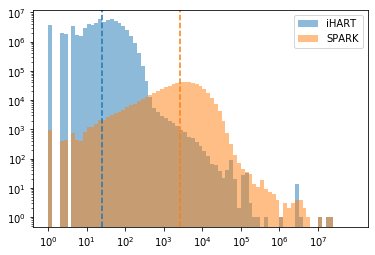

In [30]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

bins = np.arange(0, 8, 0.1)
d = np.hstack([all_positions1[i][1:]-all_positions1[i][:-1] for i in range(len(chroms))])
plt.hist(np.log10(d), bins=bins, log=True, alpha=0.5, label='iHART')
plt.axvline(np.median(np.log10(d)), linestyle='--', color=colors[0])
d = np.hstack([all_positions2[i][1:]-all_positions2[i][:-1] for i in range(len(chroms))])
plt.hist(np.log10(d), bins=bins, log=True, alpha=0.5, label='SPARK')
plt.axvline(np.median(np.log10(d)), linestyle='--', color=colors[1])

plt.xticks(np.arange(8), ['$10^%d$' % i for i in np.arange(8)])
plt.legend()
plt.show()